In [2]:
# getting the data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Phenolic content',
                  'Flavonoids', 'Non-flavonoid phenols', 'Proanthocyanidins', 'Color intensity', 'Shade',
                   'Transmittancy 280/315 nm', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
ftr_labels = df_wine.columns[1:]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, ftr_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavonoids                     0.150948
 4) Transmittancy 280/315 nm       0.131987
 5) Alcohol                        0.106589
 6) Shade                          0.078243
 7) Phenolic content               0.060718
 8) Alkalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanidins              0.022351
11) Magnesium                      0.022078
12) Non-flavonoid phenols          0.014645
13) Ash                            0.013916


In [16]:
rf_top5 = set(ftr_labels[indices[:5]])
sbs_top5 = set(['Alcohol', 'Malic acid', 'Alkalinity of ash', 'Shade', 'Proline'])
print(rf_top5.intersection(sbs_top5))

{'Alcohol', 'Proline'}


just to remind: 5 features indicated by SBS algorithm were:<br>
<i>['Alcohol', 'Malic acid', 'Alkalinity of ash', 'Shade', 'Proline']</i><br>
so if we take the intersection of 5 best indicated by SBS<br>
and RF, we get <i>{'Alcohol', 'Proline'}</i><br>
...just a side note. Frankly, I was expecting more common features.

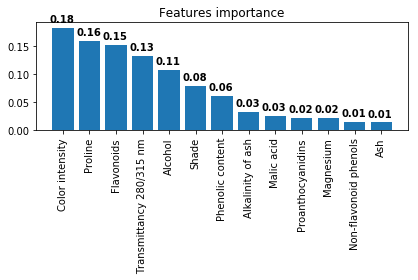

In [36]:
import matplotlib.pyplot as plt
plt.title("Features importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), ftr_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
for i, v in enumerate(importances[indices]):
    plt.text(i-.5, v+0.01, "%.2f" % (v, ), fontweight='bold')
plt.show()